<a href="https://colab.research.google.com/github/chandra-sekar-1983/RegressionAnalysis/blob/master/Linear_Regression_with_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
## linear regression with gradient descent

cost function
Error(m,b)=1N∑i=1N(actualoutput−predictedoutput)2

In [0]:
def cost_function(m, b, x, y):
    totalError = 0
    for i in range(0, len(x)):
        totalError += (y[i]-(m*x[i]+b))**2
    return totalError/float(len(x))

In [77]:
m,b=1,0
x=np.array([[3],[4],[5]])
y=np.array([[2],[3],[4]])
cost_function(m,b,x,y)

array([1.])

General Gradient Descent Formula:

θj:=θj−α∂∂θjJ(θ0,θ1)

Gradient Descent Formulars for simple linear regression:

∂∂m=2N∑i=1N−xi(yi−(mxi+b))

∂∂b=2N∑i=1N−(yi−(mxi+b))

The implementation of gradient descent is a little bit more involved but it’s also easily doable in pure Python.

In [0]:
def gradient_descent(b, m, x, y, learning_rate, num_iterations):
    N = float(len(x))
    for j in range(num_iterations): # repeat for num_iterations
        b_gradient = 0
        m_gradient = 0
        for i in range(0, len(x)):
            b_gradient += -(2/N) * (y[i] - ((m * x[i]) + b))
            m_gradient += -(2/N) * x[i] * (y[i] - ((m * x[i]) + b))
        b -= (learning_rate * b_gradient)
        m -= (learning_rate * m_gradient)
        if j%50==0:
            print('error:', cost_function(m, b, x, y))
    return [b, m]

Running Linear Regression

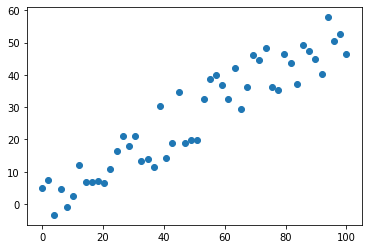

In [79]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 100, 50)
delta = np.random.uniform(-10, 10, x.size)
y = 0.5*x + 3 + delta

plt.scatter(x, y)

In [80]:
# defining some variables
learning_rate = 0.0001
initial_b = 0
initial_m = 0
num_iterations= 100

print('Initial error:', cost_function(initial_m, initial_b, x, y))
[b, m] = gradient_descent(initial_b, initial_m, x, y, learning_rate, num_iterations)
print('b:', b)
print('m:', m)
print('error:', cost_function(m, b, x, y))

Initial error: 1010.8485266392895
error: 137.24070144390095
error: 33.08376450070429
b: 0.010441406630605415
m: 0.5387015343543697
error: 33.08347315996547


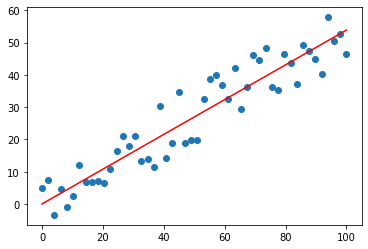

In [81]:
predictions = [(m * x[i]) + b for i in range(len(x))]
plt.scatter(x, y)
plt.plot(x, predictions, color='r')

diplayurl-https://gilberttanner.com/blog/linear-regression-explained

Multivariate Linear Regression


In [0]:
def cost_function(x, y, w):
    dif = np.dot(x,w)-y # difference between f(x) and y output
    cost = np.sum(dif**2) / (2*np.shape(x)[0])
    return dif, cost

In [0]:
def multivariate_gradient_descent(x, y, w, learning_rate, num_iterations):
    for i in range(num_iterations):
        dif, cost = cost_function(x, y, w)
        gradient = np.dot(x.transpose(), dif) / np.shape(x)[0]
        w = w - learning_rate * gradient
        if i%500==0:
            print('error:', cost)
    return w

Running Multivariate Linear Regression

In [84]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label'])
le = LabelEncoder()
iris['label'] = le.fit_transform(iris['label'])
X = np.array(iris.drop(['petal_width'], axis=1))
y = np.array(iris['petal_width'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [85]:
learning_rate = 0.0001
num_iterations= 10000
_, num_features = np.shape(X)
initial_weights = np.zeros(num_features)#initialize all weights as 0
weights = multivariate_gradient_descent(X, y, initial_weights, learning_rate, num_iterations)
print(weights)
dif, cost = cost_function(X, y, weights)
print('error: ', cost)

error: 1.0076666666666665
error: 0.1210217434937757
error: 0.09967414562782186
error: 0.0840548621716564
error: 0.0715056719007265
error: 0.061418563091493523
error: 0.053308668193972716
error: 0.04678662713897807
error: 0.04153976847267908
error: 0.03731700458789664
error: 0.033916702040175564
error: 0.031176940952850778
error: 0.02896769295089422
error: 0.027184539745929347
error: 0.025743628922400785
error: 0.02457762324306148
error: 0.023632447788047125
error: 0.0228646777844948
error: 0.02223944093489925
error: 0.02172873290741385
[ 0.02954413 -0.0726195   0.29250703  0.16076298]
error:  0.021310064610819513


Regularization

Diffeent practice

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [0]:
students = {'hours': [29, 9, 10, 38, 16, 26, 50, 10, 30, 33, 43, 2, 39, 15, 44, 29, 41, 15, 24, 50],
            'test_results': [65, 7, 8, 76, 23, 56, 100, 3, 74, 48, 73, 0, 62, 37, 74, 40, 90, 42, 58, 100]}

student_data = pd.DataFrame(data=students)

STEP #3 – Defining the feature and target values

In [0]:
x = student_data.hours
y = student_data.test_results

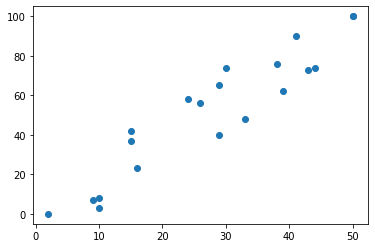

In [89]:
plt.scatter(x,y)


STEP #4 – Machine Learning: Linear Regression (line fitting)

In [0]:
model = np.polyfit(x, y, 1)


In [91]:
print(model)

array([ 2.01467487, -3.9057602 ])

In [92]:
predict = np.poly1d(model)
hours_studied = 20
predict(hours_studied)

36.38773723347844

In [93]:
from sklearn.metrics import r2_score
r2_score(y, predict(x))

0.8777480188408424

STEP #6 – Plotting the linear regression model

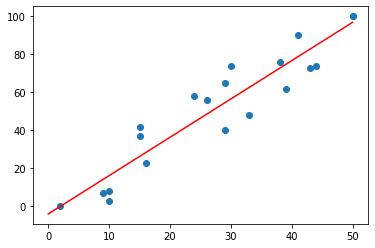

In [94]:
x_lin_reg = range(0, 51)
y_lin_reg = predict(x_lin_reg)
plt.scatter(x, y)
plt.plot(x_lin_reg, y_lin_reg, c = 'r')

effect of outliers

[1.53820064 6.96145139]
37.725464159153994
0.7887901274412


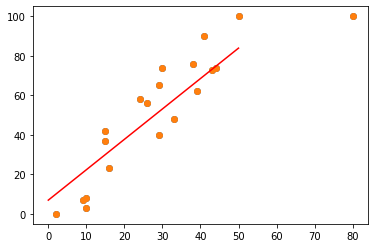

In [124]:
students = {'hours': [29, 9, 10, 38, 16, 26, 80, 10, 30, 33, 43, 2, 39, 15, 44, 29, 41, 15, 24, 50],
            'test_results': [65, 7, 8, 76, 23, 56, 100, 3, 74, 48, 73, 0, 62, 37, 74, 40, 90, 42, 58, 100]}

student_data = pd.DataFrame(data=students)
x = student_data.hours
y = student_data.test_results
plt.scatter(x,y)
model = np.polyfit(x, y, 1)

print(model)
predict = np.poly1d(model)
hours_studied = 20
print(predict(hours_studied))
from sklearn.metrics import r2_score
print(r2_score(y, predict(x)))
x_lin_reg = range(0, 51)
y_lin_reg = predict(x_lin_reg)
plt.scatter(x, y)
plt.plot(x_lin_reg, y_lin_reg, c = 'r')

effect of missing value imputation

[ 2.03287425 -4.40897308]
36.24851196941393
0.7609888009964871


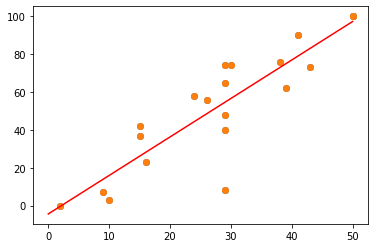

In [125]:
students = {'hours': [29, 9, 29, 38, 16, 26, 50, 10, 30, 29, 43, 2, 39, 15, 29, 29, 41, 15, 24, 50],
            'test_results': [65, 7, 8, 76, 23, 56, 100, 3, 74, 48, 73, 0, 62, 37, 74, 40, 90, 42, 58, 100]}

student_data = pd.DataFrame(data=students)
x = student_data.hours
y = student_data.test_results
plt.scatter(x,y)
model = np.polyfit(x, y, 1)

print(model)
predict = np.poly1d(model)
hours_studied = 20
print(predict(hours_studied))
from sklearn.metrics import r2_score
print(r2_score(y, predict(x)))
x_lin_reg = range(0, 51)
y_lin_reg = predict(x_lin_reg)
plt.scatter(x, y)
plt.plot(x_lin_reg, y_lin_reg, c = 'r')

In [129]:
df.shape


(20, 2)